# Ironkaggle

In [55]:
%matplotlib inline

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import  fetch_california_housing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


sns.set_context("notebook", font_scale=1.5)
plt.rcParams['figure.figsize'] = (17, 5)

## Read data + clean

### Read

In [41]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/sales.csv")
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   True_index           640840 non-null  int64 
 1   Store_ID             640840 non-null  int64 
 2   Day_of_week          640840 non-null  int64 
 3   Date                 640840 non-null  object
 4   Nb_customers_on_day  640840 non-null  int64 
 5   Open                 640840 non-null  int64 
 6   Promotion            640840 non-null  int64 
 7   State_holiday        640840 non-null  object
 8   School_holiday       640840 non-null  int64 
 9   Sales                640840 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 48.9+ MB


### Clean

In [43]:
# Convert Date to datetime

df = df_raw.copy()

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Month_day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year

df = df.drop('Date', axis=1)

# Convert State_holiday with get dummies

df = pd.get_dummies(df, columns=['State_holiday'], drop_first=True)

#drop store id column

df = df.drop(['Store_ID', 'True_index'], axis=1)

#when the store is not open there are no sales

print("Sales", df[df['Open'] == 0]['Sales'].sum())

df = df[df['Open'] == 1]

#drop Open column

df = df.drop('Open', axis=1)

Sales 0


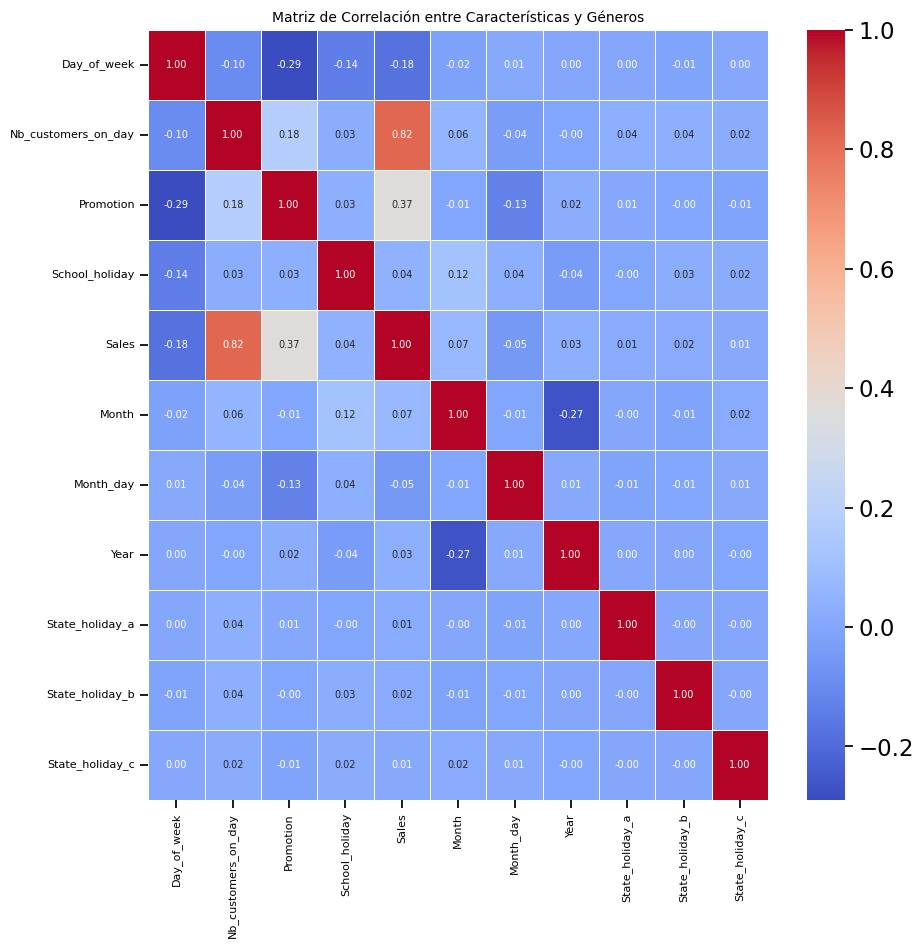

In [44]:
corr_matrix = df.corr()

# Crear un heatmap para visualizar la matriz de correlación
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True,fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 7})  # "annot_kws" controla el tamaño de las anotaciones
plt.xticks(fontsize=8)  # Cambiar el tamaño de la fuente en las etiquetas del eje X
plt.yticks(fontsize=8)  # Cambiar el tamaño de la fuente en las etiquetas del eje Y
plt.title('Matriz de Correlación entre Características y Géneros', fontsize=10)

plt.show()

In [48]:
# let's define our X and y
# X is the numerical features
X = df.drop('Sales', axis = 1)

# The target y is the top level genre. 
y = df['Sales']

# divide test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# normalise with Scaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

## Models

### Random Forest

In [51]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor


rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
rf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = rf.predict(X_test)

# Evaluar la precisión del modelo
print("MAE", mean_absolute_error(y_pred, y_test))
print("RMSE", mean_squared_error(y_pred, y_test, squared=False))
print("R2 score", rf.score(X_test, y_test))

MAE 1151.4737448288804
RMSE 1578.2342680056981


/Users/almu/Code/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R2 score 0.7394740090640093


### Bagging and Pasting

In [69]:
bagging_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=20), n_estimators=100,
                               max_samples = 1000, bootstrap = True)

bagging_reg.fit(X_train_norm, y_train)

pred = bagging_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", bagging_reg.score(X_test_norm, y_test))

MAE 1060.2294260099875
RMSE 1467.6112686146303


/Users/almu/Code/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R2 score 0.7747160801977828


### Gradient Boosting

In [68]:
gb_reg = GradientBoostingRegressor(n_estimators=100)
gb_reg.fit(X_train_norm, y_train)

pred = gb_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", gb_reg.score(X_test_norm, y_test))

MAE 1046.2615398847013
RMSE 1435.3652124642276
R2 score 0.7845071070542065


/Users/almu/Code/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### AdaBoosting

In [66]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=20),
                            n_estimators=100)

ada_reg.fit(X_train_norm, y_train)

pred = ada_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", ada_reg.score(X_test_norm, y_test))

MAE 1620.451662847035
RMSE 2058.5533873806207


/Users/almu/Code/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R2 score 0.5567666933424127


## Hyperparameter tuning

In [ ]:
grid = {"n_estimators": [50, 100, 200, 500],
        "estimator__max_leaf_nodes": [250, 500, 1000, None],
        "estimator__max_depth":[10,30,50]}

In [ ]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor())